# Rede Neural Convolucional com Dataset mnist

In [14]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing import image
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


### Plotando um exemplo de imagem

Text(0.5, 1.0, 'Classe:7')

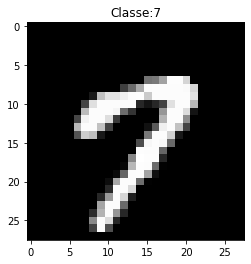

In [4]:
plt.imshow(x_train[15], cmap="gray")
plt.title(f"Classe:{y_train[15]}")

### Pegando apenas um canal de cor das imagens

Text(0.5, 1.0, 'Classe:7')

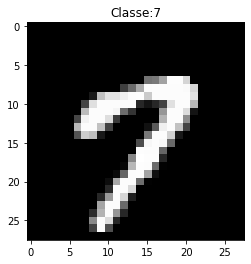

In [5]:
prev_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
prev_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

prev_train = prev_train.astype("float32")
prev_test = prev_test.astype("float32")

plt.imshow(prev_train[15], cmap="gray")
plt.title(f"Classe:{y_train[15]}")

### Normalizando a escala dos valores

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

Text(0.5, 1.0, 'Classe:7')

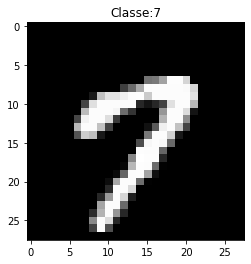

In [6]:
prev_train /= 255
prev_test /= 255

print(prev_train[15])
plt.imshow(prev_train[15], cmap="gray")
plt.title(f"Classe:{y_train[15]}")

### Transformando as classes em valores tipo dummy

In [7]:
class_train = np_utils.to_categorical(y_train, 10)
class_test = np_utils.to_categorical(y_test, 10)

In [8]:
print(class_test[6])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


### Criando uma rede neural convolucional

In [9]:
classificador = Sequential() # instanciando a estrutura da rede neural

# Criando o operador de convolução
classificador.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation="relu"))

# Aplicando a normalização nos atribultos previsores
classificador.add(BatchNormalization())

# Criando o kernel de Max Pooling
classificador.add(MaxPool2D(pool_size=(2, 2)))

# Criando mais uma camada de operador de convolução
classificador.add(Conv2D(32, (3, 3), activation="relu"))

# Aplicando a normalização nos atribultos previsores
classificador.add(BatchNormalization())

# Criando o kernel de Max Pooling
classificador.add(MaxPool2D(pool_size=(2, 2)))

# Criando a canada de flatten 
classificador.add(Flatten()) 

# Criando a parte da rede neural densa
classificador.add(Dense(units=128, activation="relu"))
classificador.add(Dropout(0.2))
classificador.add(Dense(units=128, activation="relu"))
classificador.add(Dropout(0.2))
classificador.add(Dense(units=10, activation="softmax"))

# Conpilando a rede neural
classificador.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Iniciando o treinamento 
classificador.fit(prev_train,
                  class_train,
                  batch_size=128,
                  epochs=5,
                  validation_data=(prev_test, class_test))


Epoch 1/5
469/469 [==============================] - 73s 153ms/step - loss: 0.4714 - accuracy: 0.8510 - val_loss: 0.1154 - val_accuracy: 0.9709
Epoch 2/5
469/469 [==============================] - 68s 146ms/step - loss: 0.0680 - accuracy: 0.9789 - val_loss: 0.0411 - val_accuracy: 0.9878
Epoch 3/5
469/469 [==============================] - 60s 129ms/step - loss: 0.0493 - accuracy: 0.9851 - val_loss: 0.0311 - val_accuracy: 0.9916
Epoch 4/5
469/469 [==============================] - 61s 130ms/step - loss: 0.0380 - accuracy: 0.9878 - val_loss: 0.0372 - val_accuracy: 0.9883
Epoch 5/5
469/469 [==============================] - 61s 130ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0328 - val_accuracy: 0.9899


In [34]:
classes = {'0': 'Número 0', '1': 'Número 1', '2': 'Número 2',
           '3': 'Número 3', '4': 'Número 4', '5': 'Número 5',
           '6': 'Número 6', '7': 'Número 7', '8': 'Número 8', '9': 'Número 9'}
print(classes)

{'0': 'Número 0', '1': 'Número 1', '2': 'Número 2', '3': 'Número 3', '4': 'Número 4', '5': 'Número 5', '6': 'Número 6', '7': 'Número 7', '8': 'Número 8', '9': 'Número 9'}


In [35]:
image_test = np.expand_dims(prev_train[23], axis= 0)
previsao = classificador.predict(image_test)
print(previsao)
previsao = np.argmax(previsao)
print(previsao)

[[3.5187984e-11 9.9999988e-01 3.6482017e-09 7.4465975e-11 6.5838131e-09
  3.2146373e-12 9.2796444e-11 8.0068624e-08 6.1735048e-11 1.6009272e-11]]
1


In [36]:
print(classes[str(previsao)])

Número 1


Text(0.5, 1.0, 'Classe:5')

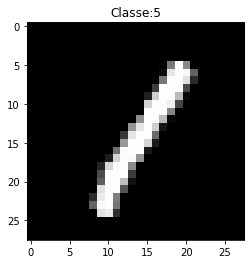

In [37]:
plt.imshow(prev_train[23], cmap="gray")
plt.title(f"Classe:{y_train[0]}")